<font face="Nunito" size=4>Impoving Trading Signal Precision though the Use of Volatility Filters
<font size=3><br><br>
    Gerard Sho$^1$, Yernur Orakbayev$^2$, Vincent Ibia$^3$, and Tiberio Stoica$^4$<br>
<font size=2.5>
    $^4$<i>PhD. Finance, Macroeconomics, The Academy of Economic Studies, Doctoral School (RO)</i>
    <br>
    $^1$gerardsho@gmail.com, $^2$yernur.orakbayev@nu.edu.kz, $^3$berkeleyvi@gmail.com

</font>
</font>
</font>

<div align=center><b>Abstract</b>

&emsp; &emsp; <i>Volatility indicators or filters are widely used in the technical trading as traders
incorporate volatility as another dimension in their trade decisions. For example, scalpers
would like to enter a position during when there is volatility while swing traders may prefer
a low volatility environment. Many different trading strategies have transpired that include
some uses of the volatility measure. On its own, the volatility indicators do not provide
enough information on the price’s direction; however, it can be used to better time the
market entry/exit. As opposed to a trigger, concurrent use of volatility filter can give a
    bigger picture of the market condition that may persist for some period of time.<br><br></i></div>
<div align=center>
    <i><b>Keywords</b>: Volatility filter, Average True Range (ATR), Volatility of Volatility</i>
</div>

$Simple~Moving~Average$

> A lax *crossover* signal is adapted by referring to is the past 30 periods simple moving average of prices (SMA-**30**) is
above or below the past 50 periods simple moving average of prices (SMA-**50**). A buy (sell) signal is taken to have been generated when the SMA-**30** exceeds (drops below) the SMA-**50**.


- (i) When the SMA-30 crosses above the SMA-50, this constitutes a buy signal and any short positions are closed and a long position is opened.
- (ii) When the SMA-30 crosses below the SMA-50, this constitutes a buy signal and any long positions are closed and a short position is opened

$Volatility~Filter~–~Average~True~Range~(ATR)$


Current ATR = \[ ( Prior ATR × (n − 1)) + Current TR \] $\div$ n *$~~~~$ formula (1)*

where $n$ is the user-defined number of periods,

Current TR = Max(−Current Low, Current High − Previous Close, Current Low − Previous Close) *$~~~~$ formula (2)*

<div class=alert-info><font face="Nunito" size=4>0. Imports</font></div>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
plt.style.use("fivethirtyeight")
%matplotlib inline

<div class=alert-info><font face="Nunito" size=4>I. Load Data into a DataFrame</font></div>

<font face="Nunito" size=3>
We will be using the following data:
    <li> Daily data from the S\&P500, from 2007-01-03 to 2020-12-31, from <a href="https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC">Yahoo! Finance</a>
</font>

Yahoo!Finance
- columns: date, open, high, low, close, adj close, volume
- dates: as listed above
- ticker in Yahoo! Finance: `^GSPC`


In [11]:
# Yahoo!Finance
yfdf = pd.read_csv("data_files/YFSnp500_2007-20_GSPC.csv",parse_dates=[0],
                   names=["date", "open", "high", "low", "close", "adjClose"],
                   header=0, # explicitly says the first row is a header so we can override the names
                   usecols=range(6))
yfdf.drop(columns="adjClose",inplace=True,axis=1)

- Acsending order

In [12]:
yfdf.head(7)

,date,open,high,low,close
0,2007-01-03,1418.030029,1429.420044,1407.859985,1416.599976
1,2007-01-04,1416.599976,1421.839966,1408.430054,1418.339966
2,2007-01-05,1418.339966,1418.339966,1405.750000,1409.709961
3,2007-01-08,1409.260010,1414.979980,1403.969971,1412.839966
4,2007-01-09,1412.839966,1415.609985,1405.420044,1412.109985
5,2007-01-10,1408.699951,1415.989990,1405.319946,1414.849976
6,2007-01-11,1414.839966,1427.119995,1414.839966,1423.819946


<div class=alert-info><font face="Nunito" size=4>II. Visually Show the Close Price</font></div>

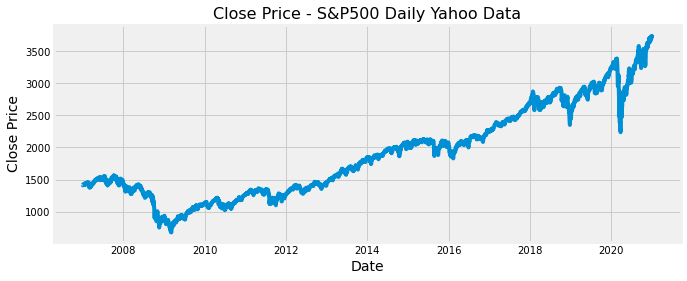

In [13]:
plt.figure(figsize=(10,4))
plt.title("Close Price - S&P500 Daily Yahoo Data", fontsize=16)
plt.plot(yfdf["date"], yfdf.close)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Close Price", fontsize=14)
plt.show()

<div class=alert-info><font face="Nunito" size=4>III. Calculate the Moving Averages</font></div>

$Simple~Moving~Average$

> A lax *crossover* signal is adapted by referring to is the past 30 periods simple moving average of prices (SMA-**30**) is
above or below the past 50 periods simple moving average of prices (SMA-**50**). A buy (sell) signal is taken to have been generated when the SMA-**30** exceeds (drops below) the SMA-**50**.


- (i) When the SMA-30 crosses above the SMA-50, this constitutes a buy signal and any short positions are closed and a long position is opened.
- (ii) When the SMA-30 crosses below the SMA-50, this constitutes a buy signal and any long positions are closed and a short position is opened

In [14]:
# SMA-30 and SMA-50 for daily data
daySMA30 = yfdf.close.rolling(window=30,).mean()
daySMA50 = yfdf.close.rolling(window=50).mean()

<div class=alert-info><font face="Nunito" size=4>IV. Visualize the Closing Price along with the Moving Averages</font></div>

In [15]:
yfdf["sma30"] = daySMA30
yfdf["sma50"] = daySMA50

In [16]:
yfdf.head()

,date,open,high,low,close,sma30,sma50
0,2007-01-03,1418.030029,1429.420044,1407.859985,1416.599976,NaN,NaN
1,2007-01-04,1416.599976,1421.839966,1408.430054,1418.339966,NaN,NaN
2,2007-01-05,1418.339966,1418.339966,1405.750000,1409.709961,NaN,NaN
3,2007-01-08,1409.260010,1414.979980,1403.969971,1412.839966,NaN,NaN
4,2007-01-09,1412.839966,1415.609985,1405.420044,1412.109985,NaN,NaN


In [17]:
yfdf.tail()

,date,open,high,low,close,sma30,sma50
3520,2020-12-24,3694.030029,3703.820068,3689.320068,3703.060059,3650.491333,3563.210796
3521,2020-12-28,3723.030029,3740.510010,3723.030029,3735.360107,3657.103003,3568.251196
3522,2020-12-29,3750.010010,3756.120117,3723.310059,3727.040039,3661.832674,3573.115796
3523,2020-12-30,3736.189941,3744.629883,3730.209961,3732.040039,3665.337012,3579.218198
3524,2020-12-31,3733.270020,3760.199951,3726.879883,3756.070068,3670.221680,3585.477197


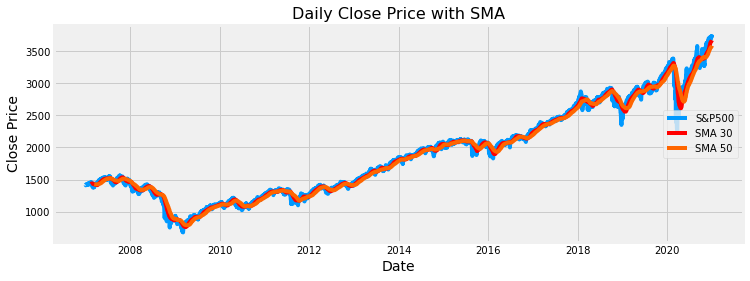

In [18]:
plt.figure(figsize=(11,4))
plt.title("Daily Close Price with SMA", fontsize=16)
plt.plot(yfdf.date,yfdf.close, label = "S&P500", color="#0099ff")
# Now plot the EMA data
plt.plot(yfdf.date,yfdf.sma30, label = "SMA 30", color="red")
plt.plot(yfdf.date,yfdf.sma50, label = "SMA 50", color="#ff6600")
# ----
plt.xlabel("Date",fontsize=14)
plt.ylabel("Close Price", fontsize=14)
plt.legend(loc="center right")
plt.show()

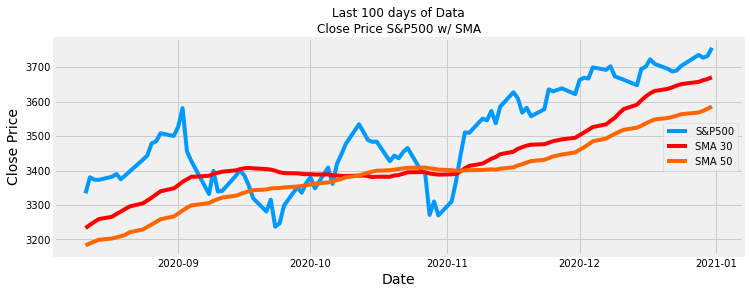

In [19]:
plt.figure(figsize=(11,4))
plt.title("Last 100 days of Data\nClose Price S&P500 w/ SMA", fontsize=12)
plt.plot(yfdf.date[-100:],yfdf.close[-100:], label = "S&P500", color="#0099ff")
# Now plot the EMA data
plt.plot(yfdf.date[-100:],yfdf.sma30[-100:], label = "SMA 30", color="red")
plt.plot(yfdf.date[-100:],yfdf.sma50[-100:], label = "SMA 50", color="#ff6600")
# ----
plt.xlabel("Date",fontsize=14)
plt.ylabel("Close Price", fontsize=14)
plt.legend(loc="center right")
plt.show()

<div class=alert-info><font face="Nunito" size=4>V. Create the columns for Volatility</font></div>

- We will also ad colmns for log returns, and percetange returns

In [20]:
yfdf["logRet"] = np.log(yfdf.close/yfdf.close.shift())
yfdf["pctRet"] = yfdf.close.pct_change()

In [21]:
yfdf.head()

,date,open,high,low,close,sma30,sma50,logRet,pctRet
0,2007-01-03,1418.030029,1429.420044,1407.859985,1416.599976,NaN,NaN,NaN,NaN
1,2007-01-04,1416.599976,1421.839966,1408.430054,1418.339966,NaN,NaN,0.001228,0.001228
2,2007-01-05,1418.339966,1418.339966,1405.750000,1409.709961,NaN,NaN,-0.006103,-0.006085
3,2007-01-08,1409.260010,1414.979980,1403.969971,1412.839966,NaN,NaN,0.002218,0.002220
4,2007-01-09,1412.839966,1415.609985,1405.420044,1412.109985,NaN,NaN,-0.000517,-0.000517


- Our Volatility Inidcator is the Average True Range, using periods of `n=10` and `n=20`.

To find the Current True Range (TR), we use the **Maximum** of:
 - $Current~High~−~Current~Low$, 
 - $Current~High~−~Previous~Close$ (absolute value), 
 - $Current~Low~−~Previous~Close$ (absolute value)

In [22]:
def trueRange (theDate, closeP, highP, lowP, openP, prevClose):
    x1 = highP - lowP
    x2 = abs(highP - prevClose)
    x3 = abs(lowP - prevClose)
    # return max(x1, x2, x3)
    if x2 <= x1 >= x3: tRng = x1
    elif x1 <= x2 >= x3: tRng = x2
    elif x1 <= x3 >= x2: tRng = x3
    return theDate, tRng

In [23]:
def currentTrueRange(adf):
    ct = 1 # counter
    RngDates = []
    RngValues = []
    while ct < len(adf.date):
        trd,trv = trueRange(adf.date[ct],
                            adf.close[ct],
                            adf.high[ct],
                            adf.low[ct],
                            adf.open[ct],
                            adf.close[ct-1],
                           )
        RngDates.append(trd)
        RngValues.append(trv)
        ct +=1
    return (RngDates, RngValues) # returning as tuple so it can be indexed

In [24]:
tRngDates, tRngValues = currentTrueRange(yfdf)[0], currentTrueRange(yfdf)[1]

In [25]:
tRngValues[:6]

[13.409912000000077,
 12.589966000000004,
 11.010009000000082,
 10.18994100000009,
 10.670043999999962,
 12.280029000000013]

- The ATR will be the True Range series, with the rolling window mean applied to it for a window of 10 or 20

In [26]:
temp1 = [np.nan] + tRngValues
yfdf["true_range"] = temp1
yfdf.head()

,date,open,high,low,close,sma30,sma50,logRet,pctRet,true_range
0,2007-01-03,1418.030029,1429.420044,1407.859985,1416.599976,NaN,NaN,NaN,NaN,NaN
1,2007-01-04,1416.599976,1421.839966,1408.430054,1418.339966,NaN,NaN,0.001228,0.001228,13.409912
2,2007-01-05,1418.339966,1418.339966,1405.750000,1409.709961,NaN,NaN,-0.006103,-0.006085,12.589966
3,2007-01-08,1409.260010,1414.979980,1403.969971,1412.839966,NaN,NaN,0.002218,0.002220,11.010009
4,2007-01-09,1412.839966,1415.609985,1405.420044,1412.109985,NaN,NaN,-0.000517,-0.000517,10.189941


- Now that we've made the True Range column, we no longer need `High` nor `Low` values

In [27]:
yfdf.drop(columns="high",inplace=True)
yfdf.drop(columns="low",inplace=True)

In [28]:
yfdf["ATR10"] = yfdf.true_range.rolling(window=10, min_periods=0).mean()
yfdf["ATR20"] = yfdf.true_range.rolling(window=20, min_periods=0).mean()

In [29]:
yfdf.iloc[:7,-5:]

,logRet,pctRet,true_range,ATR10,ATR20
0,NaN,NaN,NaN,NaN,NaN
1,0.001228,0.001228,13.409912,13.409912,13.409912
2,-0.006103,-0.006085,12.589966,12.999939,12.999939
3,0.002218,0.002220,11.010009,12.336629,12.336629
4,-0.000517,-0.000517,10.189941,11.799957,11.799957
5,0.001938,0.001940,10.670044,11.573974,11.573974
6,0.006320,0.006340,12.280029,11.691650,11.691650


<div class=alert-info><font face="Nunito" size=4>VI. Align the SMAs to the dates they will be predicting for</font></div>

<font face="Nunito" size=3>
    Our data is in ascending order. We will <code>shift()</code> a series of indicators <b>down</b> by one row, such that<br>
&emsp;&emsp; - the indicator for day X is aligned with the data/price for day X+1<br>
&emsp;&emsp; - (alternatively) the indicator for day X-1 is aligned with data for day X</font>

In [30]:
# We shift the SMA, True Range and ATR columns
yfdf.sma30 = yfdf.sma30.shift()
yfdf.sma50 = yfdf.sma50.shift()
#yfdf.pctRet = yfdf.pctRet.shift()
yfdf.true_range = yfdf.true_range.shift()
yfdf.ATR10 = yfdf.ATR10.shift()
yfdf.ATR20 = yfdf.ATR20.shift()

In [31]:
yfdf.iloc[:6,-5:]

,logRet,pctRet,true_range,ATR10,ATR20
0,NaN,NaN,NaN,NaN,NaN
1,0.001228,0.001228,NaN,NaN,NaN
2,-0.006103,-0.006085,13.409912,13.409912,13.409912
3,0.002218,0.002220,12.589966,12.999939,12.999939
4,-0.000517,-0.000517,11.010009,12.336629,12.336629
5,0.001938,0.001940,10.189941,11.799957,11.799957


<div class=alert-info><font face="Nunito" size=4>VII. Create the  Buy and Sell Decisions</font></div>

We will do this in two parts.
- First: Create the BUY/SELL criteria/indicator/signals. With DataFrames, this is sometimes called a *mask*.
- Second: Combine the decision on bying with the decision on selling, on each date

#### part-0: Strategy Recap and Reformat

Strategy I: SMA
- Buy, Close Short: SMA 30 > SMA 50
- Sell, Close Long: SMA 30 < SMA 50

Strategy II: SMA + ATR
- Buy, Close Short: SMA 30 > SMA 50 and ATR > T
- Sell, Close Long: SMA 30 < SMA 50 and ATR > T
- where T is the True Range

Strategy III: SMA + Reverse ATR (reverse Buy/Sell decision of Strategy II)
- Sell, Close Long: SMA 30 > SMA 50 and ATR > T
- Buy, Close Short: SMA 30 < SMA 50 and ATR > T
- where T is the True Range

Strategy IV: SMA + ATR of ATR
- Buy, Close Short: SMA 30 > SMA 50 and ATR$_{ATR}~$ > ATR*
- Sell, Close Long: SMA 30 < SMA 50 and ATR$_{ATR}~$ < ATR*
- where ATR* is the 10- or 20-day, and ATR$_{ATR}~$ is ATR* of ATR* 
  - (4 scenarios for each ATR option)

Strategy V: Buy and Hold

#### part-1: Create the Buy and Sell Indicator/Flag/Mask

In [32]:
# return True or False if we should buy/sell on that date.
#
# Strategy I. 2285 occurences of sm30>sma50
s1buy = yfdf.sma30 >  yfdf.sma50
s1sell = np.logical_not(s1buy)

# Strategy II
s2buy10 = s1buy & (yfdf.ATR10 > yfdf.true_range)
s2buy20 = s1buy & (yfdf.ATR20 > yfdf.true_range)

s2sell10 = s1sell & (yfdf.ATR10 > yfdf.true_range)
s2sell20 = s1sell & (yfdf.ATR20 > yfdf.true_range)


# Strategy III
s3buy10 = np.logical_not(s2buy10)
s3buy20 = np.logical_not(s2buy20)

s3sell10 = np.logical_not(s2sell10)
s3sell20 = np.logical_not(s2sell20)

In [33]:
# Strategy IV

    # Create ATR of ATR
# First number is the Window. Second number is the ATR ype we are averaging over
ATR10of10 = yfdf.ATR10.rolling(window=10, min_periods=0).mean() # aa
ATR10of20 = yfdf.ATR20.rolling(window=10, min_periods=0).mean() # ab
ATR20of10 = yfdf.ATR10.rolling(window=20, min_periods=0).mean() # ba
ATR20of20 = yfdf.ATR20.rolling(window=20, min_periods=0).mean() # bb

    # Create True False mask
s4buy10aa = s1buy & (ATR10of10 > yfdf.ATR10)
s4buy10ab = s1buy & (ATR10of20 > yfdf.ATR10)
s4buy10ba = s1buy & (ATR20of10 > yfdf.ATR10)
s4buy10bb = s1buy & (ATR20of20 > yfdf.ATR10)

s4sell10aa = s1sell & (ATR10of10 > yfdf.ATR10)
s4sell10ab = s1sell & (ATR10of20 > yfdf.ATR10)
s4sell10ba = s1sell & (ATR20of10 > yfdf.ATR10)
s4sell10bb = s1sell & (ATR20of20 > yfdf.ATR10)

    # ----------------
s4buy20aa = s1buy & (ATR10of10 > yfdf.ATR20)
s4buy20ab = s1buy & (ATR10of20 > yfdf.ATR20)
s4buy20ba = s1buy & (ATR20of10 > yfdf.ATR20)
s4buy20bb = s1buy & (ATR20of20 > yfdf.ATR20)

s4sell20aa = s1sell & (ATR10of10 > yfdf.ATR20)
s4sell20ab = s1sell & (ATR10of20 > yfdf.ATR20)
s4sell20ba = s1sell & (ATR20of10 > yfdf.ATR20)
s4sell20bb = s1sell & (ATR20of20 > yfdf.ATR20)    
# Strategy V
    # This is the returns column. 
    # With log returns, we can multiply them cumulatively for a total return.

In [34]:
# Create a Decision by multiplying Buy*1 and Sell*-1 and adding them together
# decisiondict = dict.fromkeys(["s1Decision",
#                              "s2Decision10","s2Decision20",
#                              "s3Decision10","s3Decision20"

temp1 = {1:(s1buy,s1sell),
         2:((s2buy10,s2sell10),
         (s2buy20,s2sell20)),
         
         3:((s3buy10,s3sell10),
         (s3buy20,s3sell20)),
         
         41:((s4buy10aa,s4sell10aa),
         (s4buy10ab,s4sell10ab),
         (s4buy10ba,s4sell10ba),
         (s4buy10bb,s4sell10bb)),
         
         42:((s4buy20aa,s4sell20aa),
         (s4buy20ab,s4sell20ab),
         (s4buy20ba,s4sell20ba),
         (s4buy20bb,s4sell20bb))
        }

#### part-2: Combine the Buy and Sell Indicator/Flag/Mask for each Date into a Decision

We verified using `np.logical_not` that our Buy and Sell columns were opposites.  
This ignores day one, because all EMAs have an **equal** value on that day.

In [35]:
def createDecisionMakerSeries(toBuy,toSell):
    """Since our Buy/Sell is made from a complex statement just because Buy isn't true
    doesn't mean that we Sell. Just becuase Sell isn't true doesn't mean that we buy.
    We want to make 1 series where TrueBuy=1 TrueSell=-1 and other FalseBuy or FalseSell = 0
    
    We use ( (1*Buy) + (-1*Sell) ) to acheieve this.
    """
    return ( (1*toBuy) + (-1*toSell) )

In [36]:
d1 = {1: createDecisionMakerSeries(temp1[1][0],temp1[1][1])}

d2 = {2: (createDecisionMakerSeries(temp1[2][0][0],temp1[2][0][1]),
          createDecisionMakerSeries(temp1[2][1][0],temp1[2][1][1]))}

d3 = {3: (createDecisionMakerSeries(temp1[3][0][0],temp1[3][0][1]),
          createDecisionMakerSeries(temp1[3][1][0],temp1[3][1][1]))}

d41 = {41: (createDecisionMakerSeries(temp1[41][0][0],temp1[41][0][1]),
           createDecisionMakerSeries(temp1[41][1][0],temp1[41][1][1]),
           createDecisionMakerSeries(temp1[41][2][0],temp1[41][2][1]),
           createDecisionMakerSeries(temp1[41][3][0],temp1[41][3][1]))}

d42 = {42: (createDecisionMakerSeries(temp1[42][0][0],temp1[42][0][1]),
           createDecisionMakerSeries(temp1[42][1][0],temp1[42][1][1]),
           createDecisionMakerSeries(temp1[42][2][0],temp1[42][2][1]),
           createDecisionMakerSeries(temp1[42][3][0],temp1[42][3][1]))}

- We create a copy of our df and continue working with the copy

In [37]:
strategyDF = yfdf.copy()

In [38]:
# Our Decision (Dec) columns with 1 or -1 based on the given strategy
strategyDF["s1Dec"] = d1[1]

strategyDF["s2Dec_ATR10"] = d2[2][0]
strategyDF["s2Dec_ATR20"] = d2[2][1]

strategyDF["s3Dec_ATR10"] = d3[3][0]
strategyDF["s3Dec_ATR20"] = d3[3][1]


strategyDF["s4Dec_Atr10_atr10ofAtr10"] = d41[41][0]
strategyDF["s4Dec_Atr10_atr10ofAtr20"] = d41[41][1]
strategyDF["s4Dec_Atr10_atr20ofAtr10"] = d41[41][2]
strategyDF["s4Dec_Atr10_atr20ofAtr20"] = d41[41][3]

strategyDF["s4Dec_Atr20_atr10ofAtr10"] = d42[42][0]
strategyDF["s4Dec_Atr20_atr10ofAtr20"] = d42[42][1]
strategyDF["s4Dec_Atr20_atr20ofAtr10"] = d42[42][2]
strategyDF["s4Dec_Atr20_atr20ofAtr20"] = d42[42][3]

- The are the new Decision Columns: 1 for buy, -1f or Sell, 0 for Hold, for each date and Strategy

In [39]:
strategyDF.iloc[:,-13:-8].head()

,s1Dec,s2Dec_ATR10,s2Dec_ATR20,s3Dec_ATR10,s3Dec_ATR20
0,-1,0,0,0,0
1,-1,0,0,0,0
2,-1,0,0,0,0
3,-1,-1,-1,1,1
4,-1,-1,-1,1,1


In [40]:
strategyDF.iloc[:,-8:-4].head()

,s4Dec_Atr10_atr10ofAtr10,s4Dec_Atr10_atr10ofAtr20,s4Dec_Atr10_atr20ofAtr10,s4Dec_Atr10_atr20ofAtr20
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,-1,-1,-1,-1
4,-1,-1,-1,-1


In [41]:
strategyDF.iloc[:,-4:].head()

,s4Dec_Atr20_atr10ofAtr10,s4Dec_Atr20_atr10ofAtr20,s4Dec_Atr20_atr20ofAtr10,s4Dec_Atr20_atr20ofAtr20
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,-1,-1,-1,-1
4,-1,-1,-1,-1


<div class=alert-info><font face="Nunito" size=4>VIII. Apply the Decisions to our Market Data</font></div>

Now that we have signals for each day, we can use this signal to tell us what to do tomorrow. Therefore, we can consider tomorrows gain/loss as our own gain/loss if we had followed the strategy.

**Magic Formula**  
Gain or Loss / Profit or Loss/ PnL equals:  
$\Rightarrow$ (True or False inidcator yesterday) $~\times~$ Today's Price Change
- In Python `True` is `1` and `False` is `0` so `True * -4` = -4, and `False * -2.5` = 0
- Obviously the positive number case works the same way. We use this to determine PnL.
- You can use absolute change and aggregate with addition or percent change and aggreate with multiplication.

$\Uparrow$ As we can see now Buy = 1 and Sell = -1.  
We apply (multiply) these to the one fo the return columns. It actually works that if the strategy says "Sell" (-1) and the market dropped (return is negative), then we "gain" on that day.

$\Downarrow$ The strategy in action
- If we were always LONG the market/security, our PnL would mirror the returns column. Similarly it would be the opposite of the returns column if we were always SHORT. Our true PnL will come from the combining a _Price Change_ and a _Decicion_, i.e. combine returns and a 1/-1 Buy/Sell decision.
- This combination of products will create the cumulative PnL over the entire date span.

- Current Columns `strategyDF.columns`
<font face="Nunito">
    
| | | | |
|-|-|-|-|
| date | open | close |
| sma30 | sma50 | logRet | pctRet |
| true_range | ATR10 | ATR20 |s1Dec |
| s2Dec_ATR10 | s2Dec_ATR20 | s3Dec_ATR10 | s3Dec_ATR20 | 
| s4Dec_Atr10_atr10ofAtr10 |s4Dec_Atr10_atr10ofAtr20 | s4Dec_Atr10_atr20ofAtr10 | s4Dec_Atr10_atr20ofAtr20 |
| s4Dec_Atr20_atr10ofAtr10 | s4Dec_Atr20_atr10ofAtr20 | s4Dec_Atr20_atr20ofAtr10| s4Dec_Atr20_atr20ofAtr20|

</font>

In [42]:
# Assuming Buy & Hold, our overall PnL can be calculted row-wise.
# Thes eare created using the log returns.
strategyDF["PnL_s1"] = strategyDF.logRet * strategyDF.s1Dec

strategyDF["PnL_s21"] = strategyDF.logRet * strategyDF.s2Dec_ATR10
strategyDF["PnL_s22"] = strategyDF.logRet * strategyDF.s2Dec_ATR20

strategyDF["PnL_s31"] = strategyDF.logRet * strategyDF.s3Dec_ATR10
strategyDF["PnL_s32"] = strategyDF.logRet * strategyDF.s3Dec_ATR20

# Uses Strategy 4, where ATR10 is compared to the ATR of ATR
strategyDF["PnL_s41aa"] = strategyDF.logRet * strategyDF.s4Dec_Atr10_atr10ofAtr10
strategyDF["PnL_s41ab"] = strategyDF.logRet * strategyDF.s4Dec_Atr10_atr10ofAtr20
strategyDF["PnL_s41ba"] = strategyDF.logRet * strategyDF.s4Dec_Atr10_atr20ofAtr10
strategyDF["PnL_s41bb"] = strategyDF.logRet * strategyDF.s4Dec_Atr10_atr20ofAtr20

# Uses Strategy 4, where ATR20 is compared to the ATR of ATR
strategyDF["PnL_s42aa"] = strategyDF.logRet * strategyDF.s4Dec_Atr20_atr10ofAtr10
strategyDF["PnL_s42ab"] = strategyDF.logRet * strategyDF.s4Dec_Atr20_atr10ofAtr20
strategyDF["PnL_s42ba"] = strategyDF.logRet * strategyDF.s4Dec_Atr20_atr20ofAtr10
strategyDF["PnL_s42bb"] = strategyDF.logRet * strategyDF.s4Dec_Atr20_atr20ofAtr20

In [43]:
# temporary settings change
pd.set_option('display.max_colwidth', None) # default 50 or None
pd.set_option('display.precision', 6) # default 6
#pd.set_option('display.float_format', 6)

In [44]:
strategyDF.iloc[:,-13:].head()

,PnL_s1,PnL_s21,PnL_s22,PnL_s31,PnL_s32,PnL_s41aa,PnL_s41ab,PnL_s41ba,PnL_s41bb,PnL_s42aa,PnL_s42ab,PnL_s42ba,PnL_s42bb
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.001228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.006103,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
3,-0.002218,-0.002218,-0.002218,0.002218,0.002218,-0.002218,-0.002218,-0.002218,-0.002218,-0.002218,-0.002218,-0.002218,-0.002218
4,0.000517,0.000517,0.000517,-0.000517,-0.000517,0.000517,0.000517,0.000517,0.000517,0.000517,0.000517,0.000517,0.000517


<div class="alert alert-warning"><font face="Nunito" size=4>
Before calculating the number on the portfolio, we need to remember that certain values for or columns are irrelevant before specific dates.
    <li> Since we compare SMA 30 to SMA50, we should ignore the first 50 days of data  </li>
    <li> Since our largest ATR range is 20, we should ignore 20 days of data</li>
    <li> Appropriate PnL for "buy and hold" would start from the same trading day as the other strategies</li>
</font>
</div>

In [45]:
# Notice row of index 29 has NaN in sma30 and row of index 49 has NaN for sma50
strategyDF.iloc[29:51,6:8]

,pctRet,true_range
29,0.007644,11.190063
30,0.001038,13.739990
31,-0.000872,4.780030
32,0.002844,5.240113
33,-0.001404,11.330078
34,-0.000858,7.660034
35,-0.003564,11.059936
36,-0.001254,8.020020
37,-0.034725,11.469971
38,0.005561,59.949951


In [46]:
strategyDF.iloc[50:52, [0,*range(6,10)]] # 0,range(6,10) is columns 0,6,7,8,9

,date,pctRet,true_range,ATR10,ATR20
50,2007-03-16,-0.003828,10.569946,17.218994,16.976501
51,2007-03-19,0.010894,13.880005,16.953992,17.431500


- We start by trimming the first 50 days of data as mentioned above.

In [47]:
strategyDF_full = strategyDF.copy() # saved full version
strategyDF = strategyDF.iloc[50:,:]

In [48]:
strategyDF.iloc[:,-8:].head()

,PnL_s41aa,PnL_s41ab,PnL_s41ba,PnL_s41bb,PnL_s42aa,PnL_s42ab,PnL_s42ba,PnL_s42bb
50,-0.003836,-0.000000,-0.000000,-0.0,-0.003836,-0.0,-0.0,-0.0
51,-0.010836,0.000000,0.000000,0.0,-0.010836,0.0,0.0,0.0
52,-0.006313,0.000000,0.000000,0.0,-0.006313,0.0,0.0,0.0
53,-0.016937,-0.016937,-0.016937,0.0,-0.016937,0.0,0.0,0.0
54,0.000348,-0.000000,-0.000000,-0.0,-0.000000,-0.0,-0.0,-0.0


In [49]:
# list(strategyDF.columns).index("PnL_s1")
strategyDF.columns[23:]

Index(['PnL_s1', 'PnL_s21', 'PnL_s22', 'PnL_s31', 'PnL_s32', 'PnL_s41aa',
       'PnL_s41ab', 'PnL_s41ba', 'PnL_s41bb', 'PnL_s42aa', 'PnL_s42ab',
       'PnL_s42ba', 'PnL_s42bb'],
      dtype='object')

In [50]:
logPnL_list = ['PnL_s1', 'PnL_s21', 'PnL_s22', 'PnL_s31', 'PnL_s32', 'PnL_s41aa',
               'PnL_s41ab', 'PnL_s41ba', 'PnL_s41bb', 'PnL_s42aa', 'PnL_s42ab',
               'PnL_s42ba', 'PnL_s42bb']

In [51]:
logPnL_Totals = {cname:strategyDF[cname].sum() for cname in logPnL_list}

In [52]:
logPnL_Totals["PnL_Buy_H"] = strategyDF.logRet.sum()

In [53]:
logPnL_Totals

{'PnL_s1': 0.4416579165862019,
 'PnL_s21': 0.6362859267572405,
 'PnL_s22': 0.5943627399681486,
 'PnL_s31': -0.6362859267572405,
 'PnL_s32': -0.5943627399681486,
 'PnL_s41aa': 0.2466920349912396,
 'PnL_s41ab': 0.3225713098009846,
 'PnL_s41ba': 0.3225713098009846,
 'PnL_s41bb': 0.6245637057049473,
 'PnL_s42aa': -0.04893773385686012,
 'PnL_s42ab': 0.46161759375231753,
 'PnL_s42ba': 0.46161759375231753,
 'PnL_s42bb': 0.7738897240005232,
 'PnL_Buy_H': 0.9924305041852701}

$\Uparrow$ Explanation of Results

The results above are overall returns under execution of each strategy as follows:

Strategy 5:  
$\circ$ Invest a nominal amount at "time 0" = 2007-03-16; (row 50 in `strategyDF`).  
$\circ$ Hold until 2020-12-31.  
$\bullet$ Return : 99.24%

Strategies 1-4:  
$\circ$ Invest a nominal amount at "time 0" = 2007-03-16; (row 50 in `strategyDF`).  
$\circ$ Long or Short 1 share of the index at the current market price, as directed by the Strategy.  
$\bullet$ Return : Between -61.62% to 77.38%

Table of Returns

|Strategy | Part | Short Desc. | Column Name | Profit and Loss (%) |
|--|--|--|--|--|
| I |  | SMA 30 vs 50 | 'PnL_s1' | 44.165|
| II| 1 | I + ATR10 (a) | 'PnL_s21' | 63.628|
| II| 2 | I + ATR20 (b) | 'PnL_s22' | 59.436|
| III| 1 | - II.1 | 'PnL_s31' | -63.628|
| III| 2 | - II.2 | 'PnL_s32' | -59.436|
| IV| 1a | II.1 + aa | 'PnL_s41aa' | 24.669|
| IV| 1b | II.1 + ab | 'PnL_s41ab' | 32.257|
| IV| 1c | II.1 + ba | 'PnL_s41ba' | 32.257|
| IV| 1d | II.1 + bb | 'PnL_s41bb' | 62.456|
| IV| 2a | II.2 + aa | 'PnL_s42aa' | -04.893|
| IV| 2b | II.2 + ab | 'PnL_s42ab' | 46.161|
| IV| 2c | II.2 + ba | 'PnL_s42ba' | 46.161|
| IV| 2d | II.2 + bb | 'PnL_s42bb' | 77.388|
| V |  | Buy & Hold | 'logRet' | 99.243|



<div class=alert-info><font face="Nunito" size=4>IX. Signal and Profit Plots<br></font></div>

<font face="Nunito" size=3>
We'd like to look at plots of the following:<br>
    <li> The points when our strategy told us to BUY or to SELL.</li>
    <li> The trends of the PnL over time.</li>
</font>

In [54]:
strategyDF.columns

Index(['date', 'open', 'close', 'sma30', 'sma50', 'logRet', 'pctRet',
       'true_range', 'ATR10', 'ATR20', 's1Dec', 's2Dec_ATR10', 's2Dec_ATR20',
       's3Dec_ATR10', 's3Dec_ATR20', 's4Dec_Atr10_atr10ofAtr10',
       's4Dec_Atr10_atr10ofAtr20', 's4Dec_Atr10_atr20ofAtr10',
       's4Dec_Atr10_atr20ofAtr20', 's4Dec_Atr20_atr10ofAtr10',
       's4Dec_Atr20_atr10ofAtr20', 's4Dec_Atr20_atr20ofAtr10',
       's4Dec_Atr20_atr20ofAtr20', 'PnL_s1', 'PnL_s21', 'PnL_s22', 'PnL_s31',
       'PnL_s32', 'PnL_s41aa', 'PnL_s41ab', 'PnL_s41ba', 'PnL_s41bb',
       'PnL_s42aa', 'PnL_s42ab', 'PnL_s42ba', 'PnL_s42bb'],
      dtype='object')

In [55]:
# We create a new copy of our DataFrame, ands we will change the index to dates
df2 = strategyDF.copy()

In [56]:
df2.set_index(df2.date,inplace=True)

In [57]:
df2.drop(labels="date", axis=1, inplace=True)

In [58]:
df2.iloc[:,[0,1,4,5]].head()

,open,close,logRet,pctRet
date,,,,
2007-03-16,1392.280029,1386.949951,-0.003836,-0.003828
2007-03-19,1386.949951,1402.060059,0.010836,0.010894
2007-03-20,1402.040039,1410.939941,0.006313,0.006333
2007-03-21,1410.920044,1435.040039,0.016937,0.017081
2007-03-22,1435.040039,1434.540039,-0.000348,-0.000348


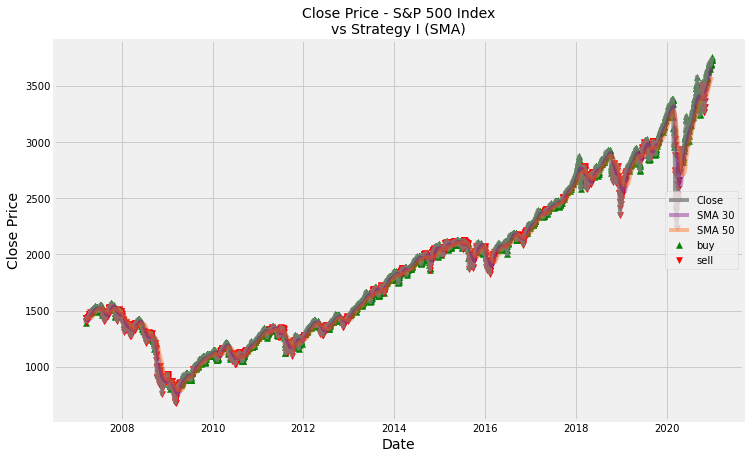

In [59]:
plt.figure(figsize=(11,7))
plt.title("Close Price - S&P 500 Index\nvs Strategy I (SMA)", fontsize=14)
plt.plot(df2.close, label = "Close", color="grey", alpha=0.8)
# Now plot the EMA data
plt.plot(df2.sma30, label = "SMA 30", color="purple", alpha=0.4)
plt.plot(df2.sma50, label = "SMA 50", color="#ff6600", alpha=0.4)
#plt.plot(df2.LEMA, label = "Long EMA", color="#ffff00", alpha=0.4 
#         ,linewidth=2
#         ,path_effects=[pe.Stroke(linewidth=4, foreground='#cccc00'), pe.Normal()])
# ----

# Now let's plot the Buy and Sell signals
    # we need to recover the price when Buy=True, but not when Buy=False
    # We need to recover the price when Sell=True, but not when Sell=False
    # These need to be in separate Series objects

    # ---- We make the Series
truebuyprice = df2.s1Dec.replace(-1,np.NAN) * df2.close # we NAN the sell signals
#truebuyprice = truebuyprice.replace(0,np.NAN)

# NAN the buys, mult -1 by -1 to keep price positive
truesellprice = df2.s1Dec.replace(1,np.NAN) * -1 * df2.close 
#truesellprice = truesellprice.replace(0,np.NAN)

    # we plot each series
plt.scatter(df2.index, truebuyprice, color="green", marker="^", label="buy")
plt.scatter(df2.index, truesellprice, color="red", marker="v", label="sell")
    # ----
# ----
plt.xlabel("Date", fontsize=14)
plt.ylabel("Close Price", fontsize=14)
plt.legend(loc="center right")
plt.show()

$\Downarrow$ Same data as above, but for the last 100 days in our timespan, to zoom in and see the Buy and Sell signals better.

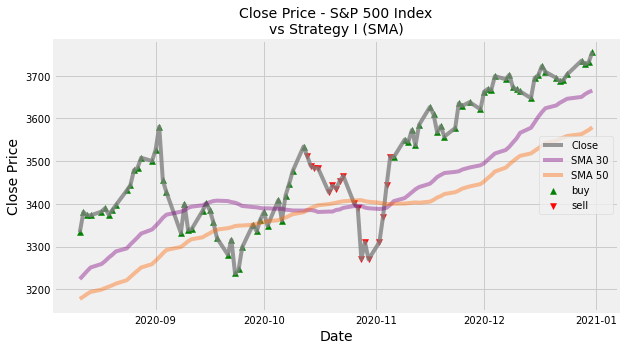

In [60]:
plt.figure(figsize=(9,5))
plt.title("Close Price - S&P 500 Index\nvs Strategy I (SMA)", fontsize=14)
plt.plot(df2.close[-100:], label = "Close", color="grey", alpha=0.8)

plt.plot(df2.sma30[-100:], label = "SMA 30", color="purple", alpha=0.4)
plt.plot(df2.sma50[-100:], label = "SMA 50", color="#ff6600", alpha=0.4)

truebuyprice = df2.s1Dec.replace(-1,np.NAN) * df2.close # we NAN the sell signals
truesellprice = df2.s1Dec.replace(1,np.NAN) * -1 * df2.close # NAN the buys, mult -1 by -1 to keep price positive

plt.scatter(df2.index[-100:], truebuyprice[-100:], color="green", marker="^", label="buy")
plt.scatter(df2.index[-100:], truesellprice[-100:], color="red", marker="v", label="sell")

plt.xlabel("Date", fontsize=14)
plt.ylabel("Close Price", fontsize=14)
plt.legend(loc="center right")
plt.show()

$\uparrow$ By zooming in on the signals for Strategy I, we can see that there are troughs in the Close price data towards the 3rd quarter of 2009, and 3rd quarter of 2010. However, in the first case, Strategy I, inidcated Buying well into and out of the through. In Q3-20100, Strategy I suggested selling, though the close price increased for the next 1-2 quarters.

- the following function will duplicate this sort of plot for our other strategies.

In [61]:
def zoomPlot(adf, adecSeries, indicSeries={}, plotSubname="Strategy", tail=100):
    # tail = 100 for last 100 points of the adf DataFrame
    # indicSeries: default empty dictionary
        # otherwise a dictionary of a text title and series object
        # maximum of 2 keys in the list will be used
        # example: {"SMA30":df2.sma30, "ATR10" : df2.ATR10}
    
    truebuy = adecSeries.replace(-1,np.NAN) * adf.close # we NAN the sell signals
    truebuy = truebuy.replace(0,np.NAN)
    
    truesell = adecSeries.replace(1,np.NAN) * -1 * adf.close
    truesell = truesell.replace(0,np.NAN)
    
    plt.figure(figsize=(9,5))
    plt.title(f"S&P 500 Close\nvs {plotSubname}", fontsize=14)
    plt.plot(adf.close[-tail:], label = "Close", color="grey", alpha=0.8)
    
    plt.scatter(adf.index[-tail:], truebuy[-tail:], color="green", marker="^", label="buy")
    plt.scatter(adf.index[-tail:], truesell[-tail:], color="red", marker="v", label="sell")
    
    # Now plot each indicator series
    if indicSeries:
        if len(indicSeries) > 1:
            sk = list(indicSeries.keys())
            plt.plot(indicSeries[sk[0]][-tail:], label = f"{sk[0]}", color="purple", alpha=0.4)
            plt.plot(indicSeries[sk[1]][-tail:], label = f"{sk[1]}", color="#ff6600", alpha=0.4)

    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Close Price", fontsize=14)
    plt.legend(loc="center right")
    plt.show()

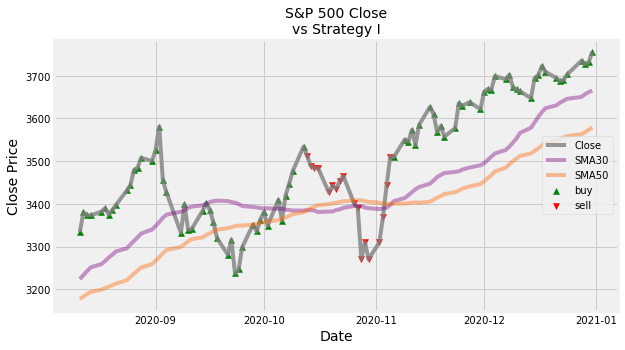

In [62]:
zoomPlot(df2,df2.s1Dec,{"SMA30":df2.sma30, "SMA50" : df2.sma50},"Strategy I",100)

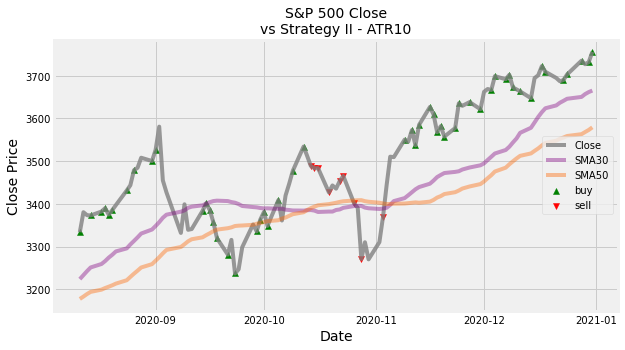

In [63]:
zoomPlot(df2,df2.s2Dec_ATR10,{"SMA30":df2.sma30, "SMA50" : df2.sma50},"Strategy II - ATR10",100)

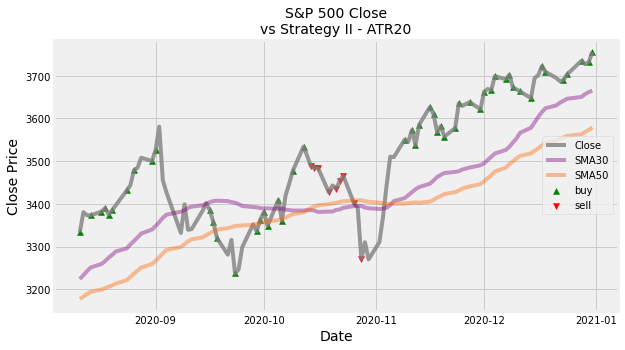

In [64]:
zoomPlot(df2,df2.s2Dec_ATR20,{"SMA30":df2.sma30,"SMA50":df2.sma50},"Strategy II - ATR20",100)

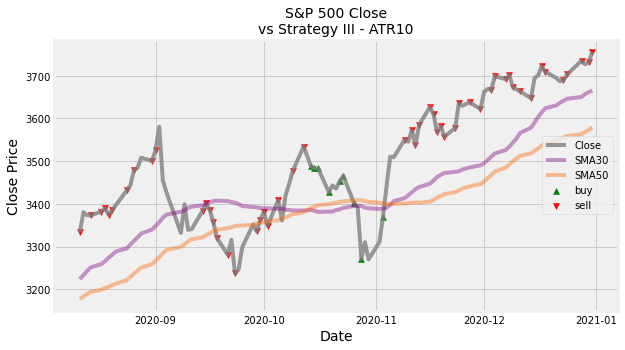

In [65]:
zoomPlot(df2,df2.s3Dec_ATR10,{"SMA30":df2.sma30,"SMA50":df2.sma50},"Strategy III - ATR10",100)

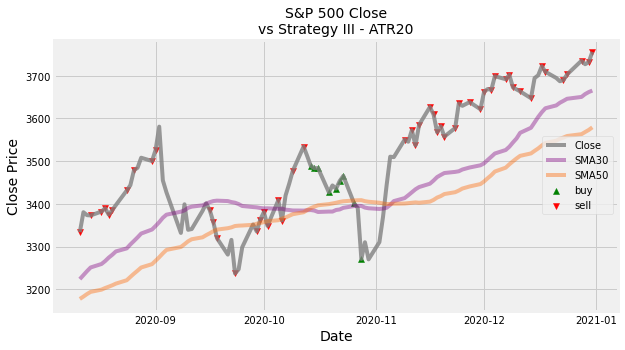

In [66]:
zoomPlot(df2,df2.s3Dec_ATR20,{"SMA30":df2.sma30,"SMA50":df2.sma50},"Strategy III - ATR20",100)

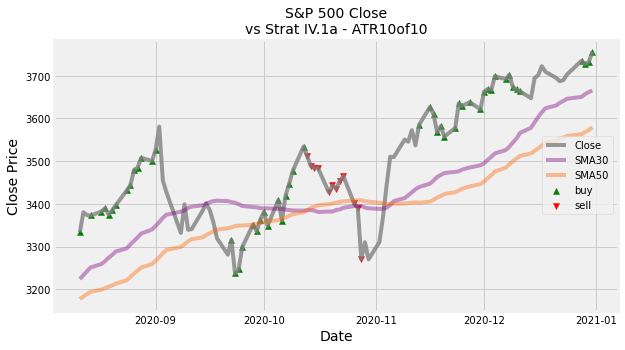

In [67]:
zoomPlot(df2,df2.s4Dec_Atr10_atr10ofAtr10,
         {"SMA30":df2.sma30,"SMA50":df2.sma50},"Strat IV.1a - ATR10of10",100)

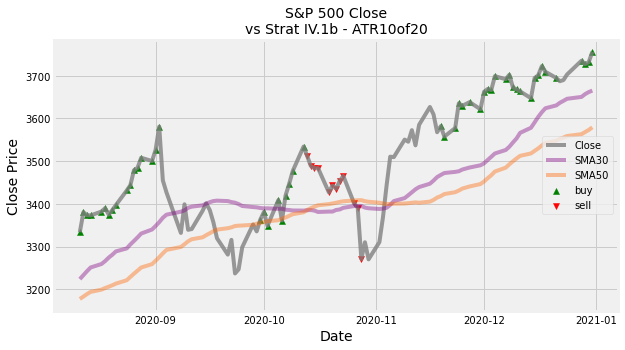

In [68]:
zoomPlot(df2,df2.s4Dec_Atr10_atr10ofAtr20,
         {"SMA30":df2.sma30,"SMA50":df2.sma50},"Strat IV.1b - ATR10of20",100)

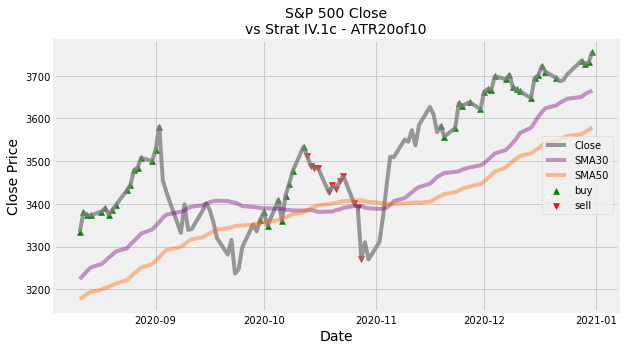

In [69]:
zoomPlot(df2,df2.s4Dec_Atr10_atr20ofAtr10,
         {"SMA30":df2.sma30,"SMA50":df2.sma50},"Strat IV.1c - ATR20of10",100)

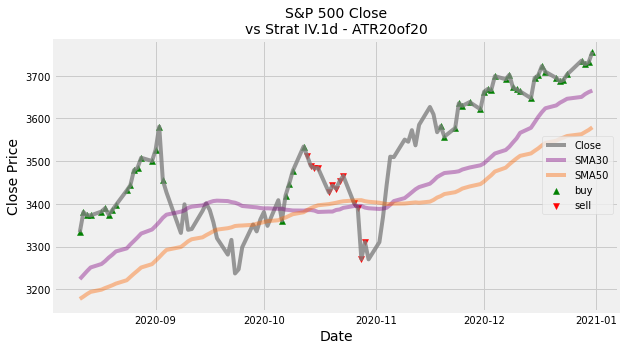

In [70]:
zoomPlot(df2,df2.s4Dec_Atr10_atr20ofAtr20,
         {"SMA30":df2.sma30,"SMA50":df2.sma50},"Strat IV.1d - ATR20of20",100)

- Now for the Strategy IV plots where ATR20 was compared to ATR$_{ATR}$

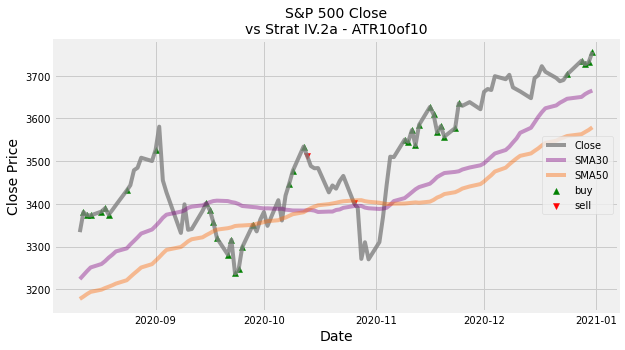

In [71]:
zoomPlot(df2,df2.s4Dec_Atr20_atr10ofAtr10,
         {"SMA30":df2.sma30,"SMA50":df2.sma50},"Strat IV.2a - ATR10of10",100)

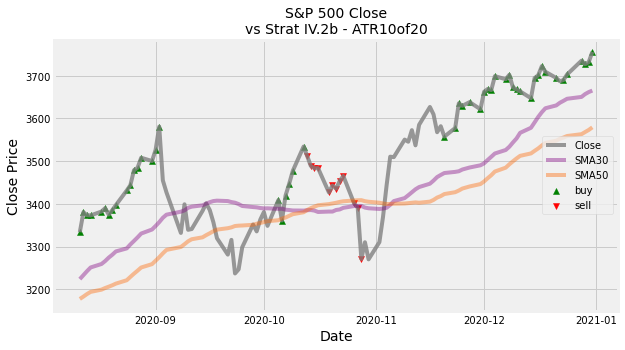

In [72]:
zoomPlot(df2,df2.s4Dec_Atr20_atr10ofAtr20,
         {"SMA30":df2.sma30,"SMA50":df2.sma50},"Strat IV.2b - ATR10of20",100)

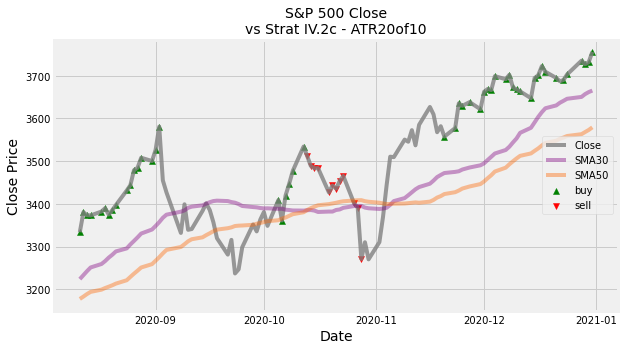

In [73]:
zoomPlot(df2,df2.s4Dec_Atr20_atr20ofAtr10,
         {"SMA30":df2.sma30,"SMA50":df2.sma50},"Strat IV.2c - ATR20of10",100)

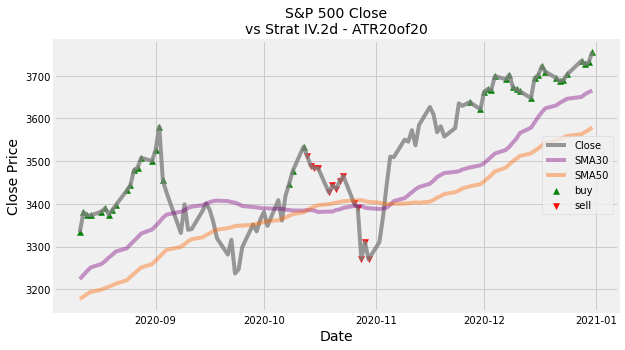

In [74]:
zoomPlot(df2,df2.s4Dec_Atr20_atr20ofAtr20,
         {"SMA30":df2.sma30,"SMA50":df2.sma50},"Strat IV.2d - ATR20of20",100)

- Another plot type of interest is with regard to the Profit and Loss for each strategy

In [76]:
profitNamesList = ['PnL_s1', 'PnL_s21', 'PnL_s22', 'PnL_s31', 'PnL_s32',
               'PnL_s41aa', 'PnL_s41ab', 'PnL_s41ba', 'PnL_s41bb',
               'PnL_s42aa', 'PnL_s42ab', 'PnL_s42ba', 'PnL_s42bb',
               'logRet']

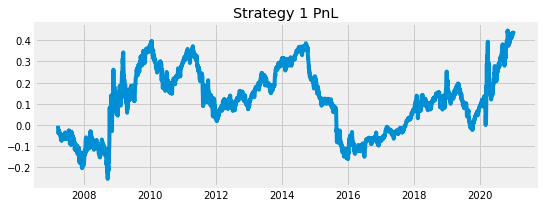

In [80]:
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(df2.index,df2[profitNamesList[0]].cumsum())
ax.set_title("Strategy 1 PnL")
plt.show()

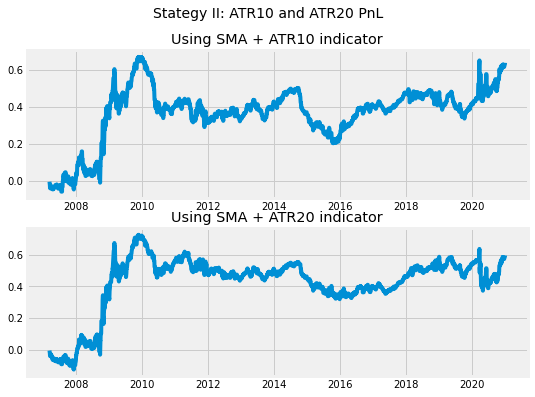

In [82]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8,6))
fig.suptitle("Strategy II: ATR10 and ATR20 PnL",size=14)
ax1.plot(df2.index,df2[profitNamesList[1]].cumsum())
ax1.title.set_text("Using SMA + ATR10 indicator")
ax2.plot(df2.index,df2[profitNamesList[2]].cumsum())
ax2.title.set_text("Using SMA + ATR20 indicator")
plt.show()

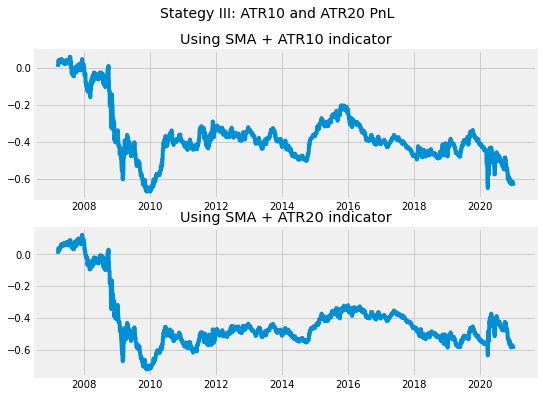

In [83]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8,6))
fig.suptitle("Strategy III: ATR10 and ATR20 PnL",size=14)
ax1.plot(df2.index,df2[profitNamesList[3]].cumsum())
ax1.title.set_text("Using SMA + ATR10 indicator")
ax2.plot(df2.index,df2[profitNamesList[4]].cumsum())
ax2.title.set_text("Using SMA + ATR20 indicator")
plt.show()

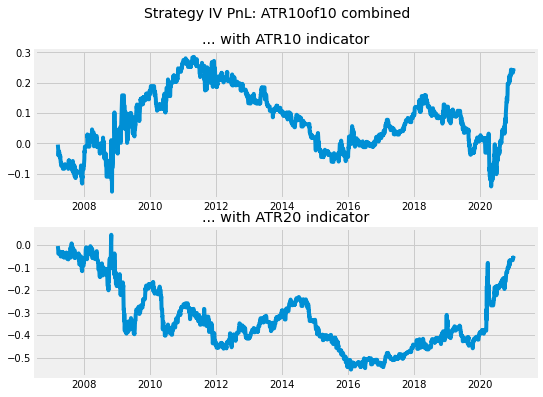

In [87]:
# Strategy IV
# 5 'PnL_s41aa', 'PnL_s41ab', 'PnL_s41ba', 'PnL_s41bb', 8
# 9 'PnL_s42aa', 'PnL_s42ab', 'PnL_s42ba', 'PnL_s42bb', 12
fig, (ax1, ax2) = plt.subplots(2, figsize=(8,6))
fig.suptitle("Strategy IV PnL: ATR10 of ATR10 combined",size=14)
ax1.plot(df2.index,df2[profitNamesList[5]].cumsum())
ax1.title.set_text("... with ATR10 indicator")
ax2.plot(df2.index,df2[profitNamesList[9]].cumsum())
ax2.title.set_text("... with ATR20 indicator")
plt.show()

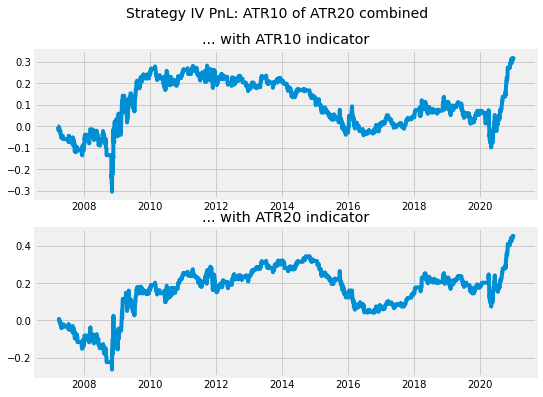

In [90]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8,6))
fig.suptitle("Strategy IV PnL: ATR10 of ATR20 combined",size=14)
ax1.plot(df2.index,df2[profitNamesList[6]].cumsum())
ax1.title.set_text("... with ATR10 indicator")
ax2.plot(df2.index,df2[profitNamesList[10]].cumsum())
ax2.title.set_text("... with ATR20 indicator")
plt.show()

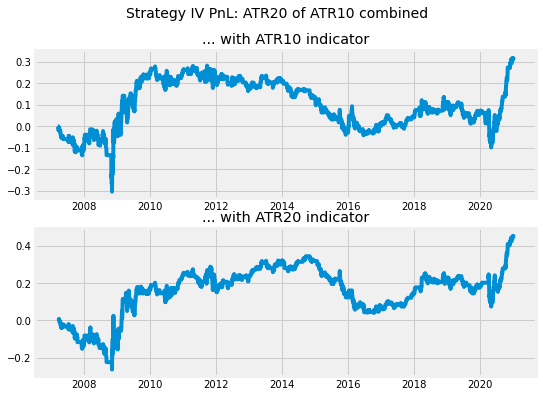

In [91]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8,6))
fig.suptitle("Strategy IV PnL: ATR20 of ATR10 combined",size=14)
ax1.plot(df2.index,df2[profitNamesList[7]].cumsum())
ax1.title.set_text("... with ATR10 indicator")
ax2.plot(df2.index,df2[profitNamesList[11]].cumsum())
ax2.title.set_text("... with ATR20 indicator")
plt.show()

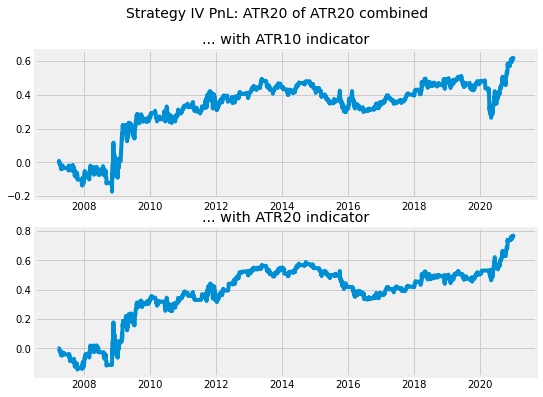

In [92]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8,6))
fig.suptitle("Strategy IV PnL: ATR20 of ATR20 combined",size=14)
ax1.plot(df2.index,df2[profitNamesList[8]].cumsum())
ax1.title.set_text("... with ATR10 indicator")
ax2.plot(df2.index,df2[profitNamesList[12]].cumsum())
ax2.title.set_text("... with ATR20 indicator")
plt.show()

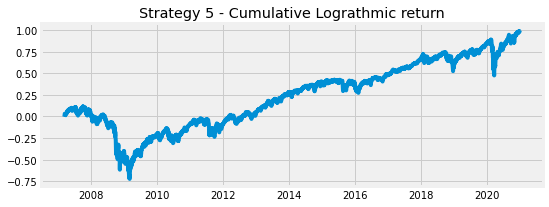

In [89]:
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(df2.index,df2[profitNamesList[13]].cumsum())
ax.set_title("Strategy 5 - Cumulative Lograthmic return")
plt.show()

# Begin Below to Fix the Portfolio Allocating Function

In [7]:
""" # draft function
def portRet(pctRetSeries,decSeries,alloc=100000,pos_size=1000,fee_rate=0.001):
    funds=alloc # 100K USD
    fee_cost = fee_rate * pos_size # 0.1% of 1000 is 1 $1 fee per position
    portPos = {"long":0,"short":0} # no open positions
    
    def emptyPortfolio(): return (portPos["long"] == 0 & portPos["short"] == 0)
    def canAfford(): return ((pos_size + fee_cost) <= funds)
    
    
    # when we see 1, 0, or -1, we go long, hold, or short, one position
    # we also close out any other open positions
    for xRet,yDec in zip(pctRetSeries,decSeries):
        if emptyPortfolio():
            if canAfford():
                if yDec == 1:
                    portPos["long"] += 1
                elif yDec == -1:
                    portPos["short"] += 1
                if yDec != 0:
                    funds = funds - (pos_size +  fee_cost)
            # else would mean we can't afford to trade today
            # since the portfolio is also empty, nothign to do
        # there are open positions in the portfolio
        else:
            # we can afford to trade
            if canAfford():
                pass
            # we can't afford to trade
            else:
                pass
"""

' # draft function\ndef portRet(pctRetSeries,decSeries,alloc=100000,pos_size=1000,fee_rate=0.001):\n    funds=alloc # 100K USD\n    fee_cost = fee_rate * pos_size # 0.1% of 1000 is 1 $1 fee per position\n    portPos = {"long":0,"short":0} # no open positions\n    \n    def emptyPortfolio(): return (portPos["long"] == 0 & portPos["short"] == 0)\n    def canAfford(): return ((pos_size + fee_cost) <= funds)\n    \n    \n    # when we see 1, 0, or -1, we go long, hold, or short, one position\n    # we also close out any other open positions\n    for xRet,yDec in zip(pctRetSeries,decSeries):\n        if emptyPortfolio():\n            if canAfford():\n                if yDec == 1:\n                    portPos["long"] += 1\n                elif yDec == -1:\n                    portPos["short"] += 1\n                if yDec != 0:\n                    funds = funds - (pos_size +  fee_cost)\n            # else would mean we can\'t afford to trade today\n            # since the portfolio is also 

In [8]:
def portRet(pctRetSeries, decSeries, alloc=100000, pos_size=1000, fee_rate=0.001):
    cash=alloc # 100K USD
    feeCost = fee_rate * pos_size
    portPos = {"long":0,"short":0}
    portVal = {"long":0,"short":0}
    
    def emptyPortfolio(): return (portPos["long"] == 0 & portPos["short"] == 0)
    # For each pair of rows we track the following:
    # signal, long|long pos ct, short|short pos ct, cash start|end, pctRet, value long|short
    for xRet,yDec in zip(pctRetSeries,decSeries):
        if yDec == 1:
            # subtract from the cash, if we can
            # subtract the fee from the cash value
            
            # add one to the open long positions
            # multiply the position size to the pctRet to get the value
            # add this value to the long value of the portfolio
            if cash >= (pos_size + feeCost):
                cash = cash - pos_size - feeCost
                portPos["long"] += 1
                portVal["long"] = portVal["long"] + (pos_size * np.exp(xRet) )
            
            # now close out any short position
            if portPos["short"] != 0:
                portPos["short"] = 0
                cash += portVal["short"]
                portVal["short"] = 0
                
                cash -= feeCost
            
        elif yDec == 0:
            # check if we have open long or short positions
            # if long is open: multiply pctRet to the current long value
            # if short is open: multiply pctRet to the current short value 
                # short will typically b a negative value, 
                # becuase -short value * -pctReturn = a Posive profit for the short seller
            if not emptyPortfolio():
                # we can only have 1 or mor long or 1 or more short, but never long and short
                # so one of these values will already be zero.
                portVal["long"] = portVal["long"] + (portVal["long"] * np.exp(xRet) )
                portVal["short"] = portVal["short"] + (portVal["short"] * np.exp(xRet) )
        
        elif yDec == -1:
            # (pctRet * -1000) is our new short value
            # we subtract fee from cash
            # add 1 to the short positions
            if cash >= (pos_size + feeCost):
                portVal["short"] = portVal["short"] + (-pos_size * np.exp(xRet) )
                portPos["short"] += 1
                
                cash -= feeCost
            
            # now close out any long position
            if portPos["long"] != 0:
                portPos["long"] = 0
                cash += portVal["long"]
                portVal["long"] = 0
                
                cash -= feeCost
        
    return {"cash":cash, "portPos":portPos, "portVal":portVal}    

In [9]:
df2.columns[7]

NameError: name 'df2' is not defined

In [ ]:
df2.columns[11:]

In [ ]:
strategySets = ([ df2.columns[7], df2.columns[11] ], #s1Dec
                
                [ df2.columns[7], df2.columns[12] ], #s2Dec_ATR10
                [ df2.columns[7], df2.columns[13] ],
                
                [ df2.columns[7], df2.columns[14] ], #s3Dec_AT10
                [ df2.columns[7], df2.columns[15] ],
                
                [ df2.columns[7], df2.columns[16] ], #s4Dec_Atr10_atr10ofAtr10
                [ df2.columns[7], df2.columns[17] ],
                [ df2.columns[7], df2.columns[18] ],
                [ df2.columns[7], df2.columns[19] ],
                
                [ df2.columns[7], df2.columns[20] ], #s4Dec_Atr20_atr10ofAtr10
                [ df2.columns[7], df2.columns[21] ],
                [ df2.columns[7], df2.columns[22] ],
                [ df2.columns[7], df2.columns[23] ],
               )

- testing portfolio execution funtion on Strategy 1

In [ ]:
portRet(df2.pctRet, df2.s1Dec)

In [ ]:
portRet(df2.pctRet, df2.s2Dec_ATR10)

In [ ]:
# Dictionary Keys to better sort results of the strategies on each portfolio
numz = [1,21,22,31,32,411,412,413,414,421,422,423,424]

In [ ]:
# we wil iterate through this to make the dictionary of results
list(zip(numz,strategySets))

In [ ]:
df2[strategySets[0][0]][:5]

In [ ]:
strategyResults = {num: portRet(df2[x[0]], df2[x[1]]) for num,x in zip(numz, strategySets)}

In [ ]:
strategyResults

In [ ]:
strategyResults[21]["cash"]

In [ ]:
df2.pctRet.cumsum()

# ----

In [ ]:
smallSet = df2[:10]

In [ ]:
smallSet

In [ ]:
smallSet.iloc[:,11:16]

In [ ]:
smallSet.iloc[:,15:19]

In [ ]:
smallSet.iloc[:,18:22]

In [ ]:
smallSet.iloc[:,21:24]

In [ ]:
smallSet.iloc[:,24:29]

In [ ]:
smallSet.iloc[:,29:]

In [ ]:
smallSet.iloc[:,-6:]

In [ ]:
def debugStrategySets(aDataFrame):
    df2 = aDataFrame.copy()
    sS = ([ df2.columns[7], df2.columns[11] ], #s1Dec

          [ df2.columns[7], df2.columns[12] ], #s2Dec_ATR10
          [ df2.columns[7], df2.columns[13] ],
          
          [ df2.columns[7], df2.columns[14] ], #s3Dec_AT10
          [ df2.columns[7], df2.columns[15] ],

          [ df2.columns[7], df2.columns[16] ], #s4Dec_Atr10_atr10ofAtr10
          [ df2.columns[7], df2.columns[17] ],
          [ df2.columns[7], df2.columns[18] ],
          [ df2.columns[7], df2.columns[19] ],

          [ df2.columns[7], df2.columns[20] ], #s4Dec_Atr20_atr10ofAtr10
          [ df2.columns[7], df2.columns[21] ],
          [ df2.columns[7], df2.columns[22] ],
          [ df2.columns[7], df2.columns[23] ],
         )
    return sS

In [ ]:
smallStratSet = debugStrategySets(smallSet)

In [ ]:
smallStratSet

In [ ]:
type(smallStratSet)

In [ ]:
def debugStrategyResults (tupleOfStrats, aDataFrame, aPortFunc=portRet):
    tOS = tupleOfStrats
    df2 = aDataFrame.copy()
    numzz = [1,21,22,31,32,411,412,413,414,421,422,423,424]
    sR = {num: aPortFunc(df2[x[0]], df2[x[1]]) for num,x in zip(numzz, tOS)}
    return sR

In [ ]:
smallResultSet = debugStrategyResults(smallStratSet, smallSet)

In [ ]:
smallResultSet

In [ ]:
def pR2(pctRetSeries, decSeries, alloc=100000, pos_size=1000, fee_rate=0.001):
    funds=alloc
    
    for ret, dec in zip(pctRetSeries,decSeries):
        if dec==1:
            # buying
            funds = funds - pos_size
            gain = gain + (pos_size * ret)
            lpos = lpos + 1
            # selling
            if spos:
                
        if dec==-1:
            funds = funds
            gain = gain + 1000
            spos = spos + 1
            

# ----

<font face="Nunito" size=4>VIII. Profit and Loss Examination</font>

<div class=alert-info><font face="Nunito" size=4>X. Portfolio Simulation<br></font></div>

In [93]:
portDf = df2.copy()

In [102]:
df2.index

DatetimeIndex(['2007-03-16', '2007-03-19', '2007-03-20', '2007-03-21',
               '2007-03-22', '2007-03-23', '2007-03-26', '2007-03-27',
               '2007-03-28', '2007-03-29',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=3475, freq=None)

In [131]:
len(df2)

3475

In [133]:
df2.index[3474]

Timestamp('2020-12-31 00:00:00')

In [96]:
df2.index[1]

Timestamp('2007-03-19 00:00:00')

In [137]:
df2.loc[df2.index[3474]]

open                        3733.270020
close                       3756.070068
sma30                       3665.337012
sma50                       3579.218198
logRet                         0.006418
pctRet                         0.006439
true_range                    17.589844
ATR10                         30.886987
ATR20                         33.116003
s1Dec                          1.000000
s2Dec_ATR10                    1.000000
s2Dec_ATR20                    1.000000
s3Dec_ATR10                   -1.000000
s3Dec_ATR20                   -1.000000
s4Dec_Atr10_atr10ofAtr10       1.000000
s4Dec_Atr10_atr10ofAtr20       1.000000
s4Dec_Atr10_atr20ofAtr10       1.000000
s4Dec_Atr10_atr20ofAtr20       1.000000
s4Dec_Atr20_atr10ofAtr10       1.000000
s4Dec_Atr20_atr10ofAtr20       1.000000
s4Dec_Atr20_atr20ofAtr10       1.000000
s4Dec_Atr20_atr20ofAtr20       1.000000
PnL_s1                         0.006418
PnL_s21                        0.006418
PnL_s22                        0.006418


In [138]:
df2.loc[df2.index[0]]

open                        1392.280029
close                       1386.949951
sma30                       1425.722343
sma50                       1425.097800
logRet                        -0.003836
pctRet                        -0.003828
true_range                    10.569946
ATR10                         17.218994
ATR20                         16.976501
s1Dec                          1.000000
s2Dec_ATR10                    1.000000
s2Dec_ATR20                    1.000000
s3Dec_ATR10                   -1.000000
s3Dec_ATR20                   -1.000000
s4Dec_Atr10_atr10ofAtr10       1.000000
s4Dec_Atr10_atr10ofAtr20       0.000000
s4Dec_Atr10_atr20ofAtr10       0.000000
s4Dec_Atr10_atr20ofAtr20       0.000000
s4Dec_Atr20_atr10ofAtr10       1.000000
s4Dec_Atr20_atr10ofAtr20       0.000000
s4Dec_Atr20_atr20ofAtr10       0.000000
s4Dec_Atr20_atr20ofAtr20       0.000000
PnL_s1                        -0.003836
PnL_s21                       -0.003836
PnL_s22                       -0.003836


In [99]:
df2.loc[df2.index[1]]

open                        1386.949951
close                       1402.060059
sma30                       1423.756010
sma50                       1424.504800
logRet                         0.010836
pctRet                         0.010894
true_range                    13.880005
ATR10                         16.953992
ATR20                         17.431500
s1Dec                         -1.000000
s2Dec_ATR10                   -1.000000
s2Dec_ATR20                   -1.000000
s3Dec_ATR10                    1.000000
s3Dec_ATR20                    1.000000
s4Dec_Atr10_atr10ofAtr10      -1.000000
s4Dec_Atr10_atr10ofAtr20       0.000000
s4Dec_Atr10_atr20ofAtr10       0.000000
s4Dec_Atr10_atr20ofAtr20       0.000000
s4Dec_Atr20_atr10ofAtr10      -1.000000
s4Dec_Atr20_atr10ofAtr20       0.000000
s4Dec_Atr20_atr20ofAtr10       0.000000
s4Dec_Atr20_atr20ofAtr20       0.000000
PnL_s1                        -0.010836
PnL_s21                       -0.010836
PnL_s22                       -0.010836


In [100]:
df2.head()

,open,close,sma30,sma50,logRet,pctRet,true_range,ATR10,ATR20,s1Dec,...,PnL_s31,PnL_s32,PnL_s41aa,PnL_s41ab,PnL_s41ba,PnL_s41bb,PnL_s42aa,PnL_s42ab,PnL_s42ba,PnL_s42bb
date,,,,,,,,,,,,,,,,,,,,,
2007-03-16,1392.280029,1386.949951,1425.722343,1425.097800,-0.003836,-0.003828,10.569946,17.218994,16.976501,1,...,0.003836,0.003836,-0.003836,-0.000000,-0.000000,-0.0,-0.003836,-0.0,-0.0,-0.0
2007-03-19,1386.949951,1402.060059,1423.756010,1424.504800,0.010836,0.010894,13.880005,16.953992,17.431500,-1,...,0.010836,0.010836,-0.010836,0.000000,0.000000,0.0,-0.010836,0.0,0.0,0.0
2007-03-20,1402.040039,1410.939941,1422.211678,1424.179202,0.006313,0.006333,16.250000,16.789990,17.981995,-1,...,0.006313,0.006313,-0.006313,0.000000,0.000000,0.0,-0.006313,0.0,0.0,0.0
2007-03-21,1410.920044,1435.040039,1421.010010,1424.203801,0.016937,0.017081,10.830078,15.489001,17.956995,-1,...,0.016937,0.016937,-0.016937,-0.016937,-0.016937,0.0,-0.016937,0.0,0.0,0.0
2007-03-22,1435.040039,1434.540039,1420.578011,1424.647803,-0.000348,-0.000348,28.020020,17.239002,18.974994,-1,...,-0.000000,-0.000000,0.000348,-0.000000,-0.000000,-0.0,-0.000000,-0.0,-0.0,-0.0


In [124]:
asdf= pd.DataFrame(data={"cat":9,"dog":7}, index=[0])
asdf

,cat,dog
0,9,7


In [125]:
asdf.loc[asdf.index.max()+1] = [10,11]

In [126]:
asdf

,cat,dog
0,9,7
1,10,11


In [ ]:
def portSim(adf):
    ROWMAX = adf.index.max() + 1
    for dt in adf.index:
        

<font face="Nunito" size=4>...</font>

<font face="Nunito" size=4>...</font>

<font face="Nunito" size=4>...</font>

<font face="Nunito" size=4>...</font>

<font face="Nunito" size=4>...</font>

<font face="Nunito" size=4>...</font>

<font face="Nunito" size=4>...</font>